In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


2. Load the dataset

In [51]:
df=pd.read_csv("diamonds.csv")

3. Basic Data Exploration

In [52]:
df.head()


carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [54]:
df.shape

(53940, 10)

In [55]:
df.describe()


carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

4. Data Preprocessing

In [56]:
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Label Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [58]:
categorical_columns = ['cut', 'color', 'clarity']

# Applying label encoding to each categorical column

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

Define features and the target variable

In [59]:
# Split the data into features and target

X=df.drop(['price'],axis=1)
y=df['price']

5. Data Visualization

Correlation Heatmap

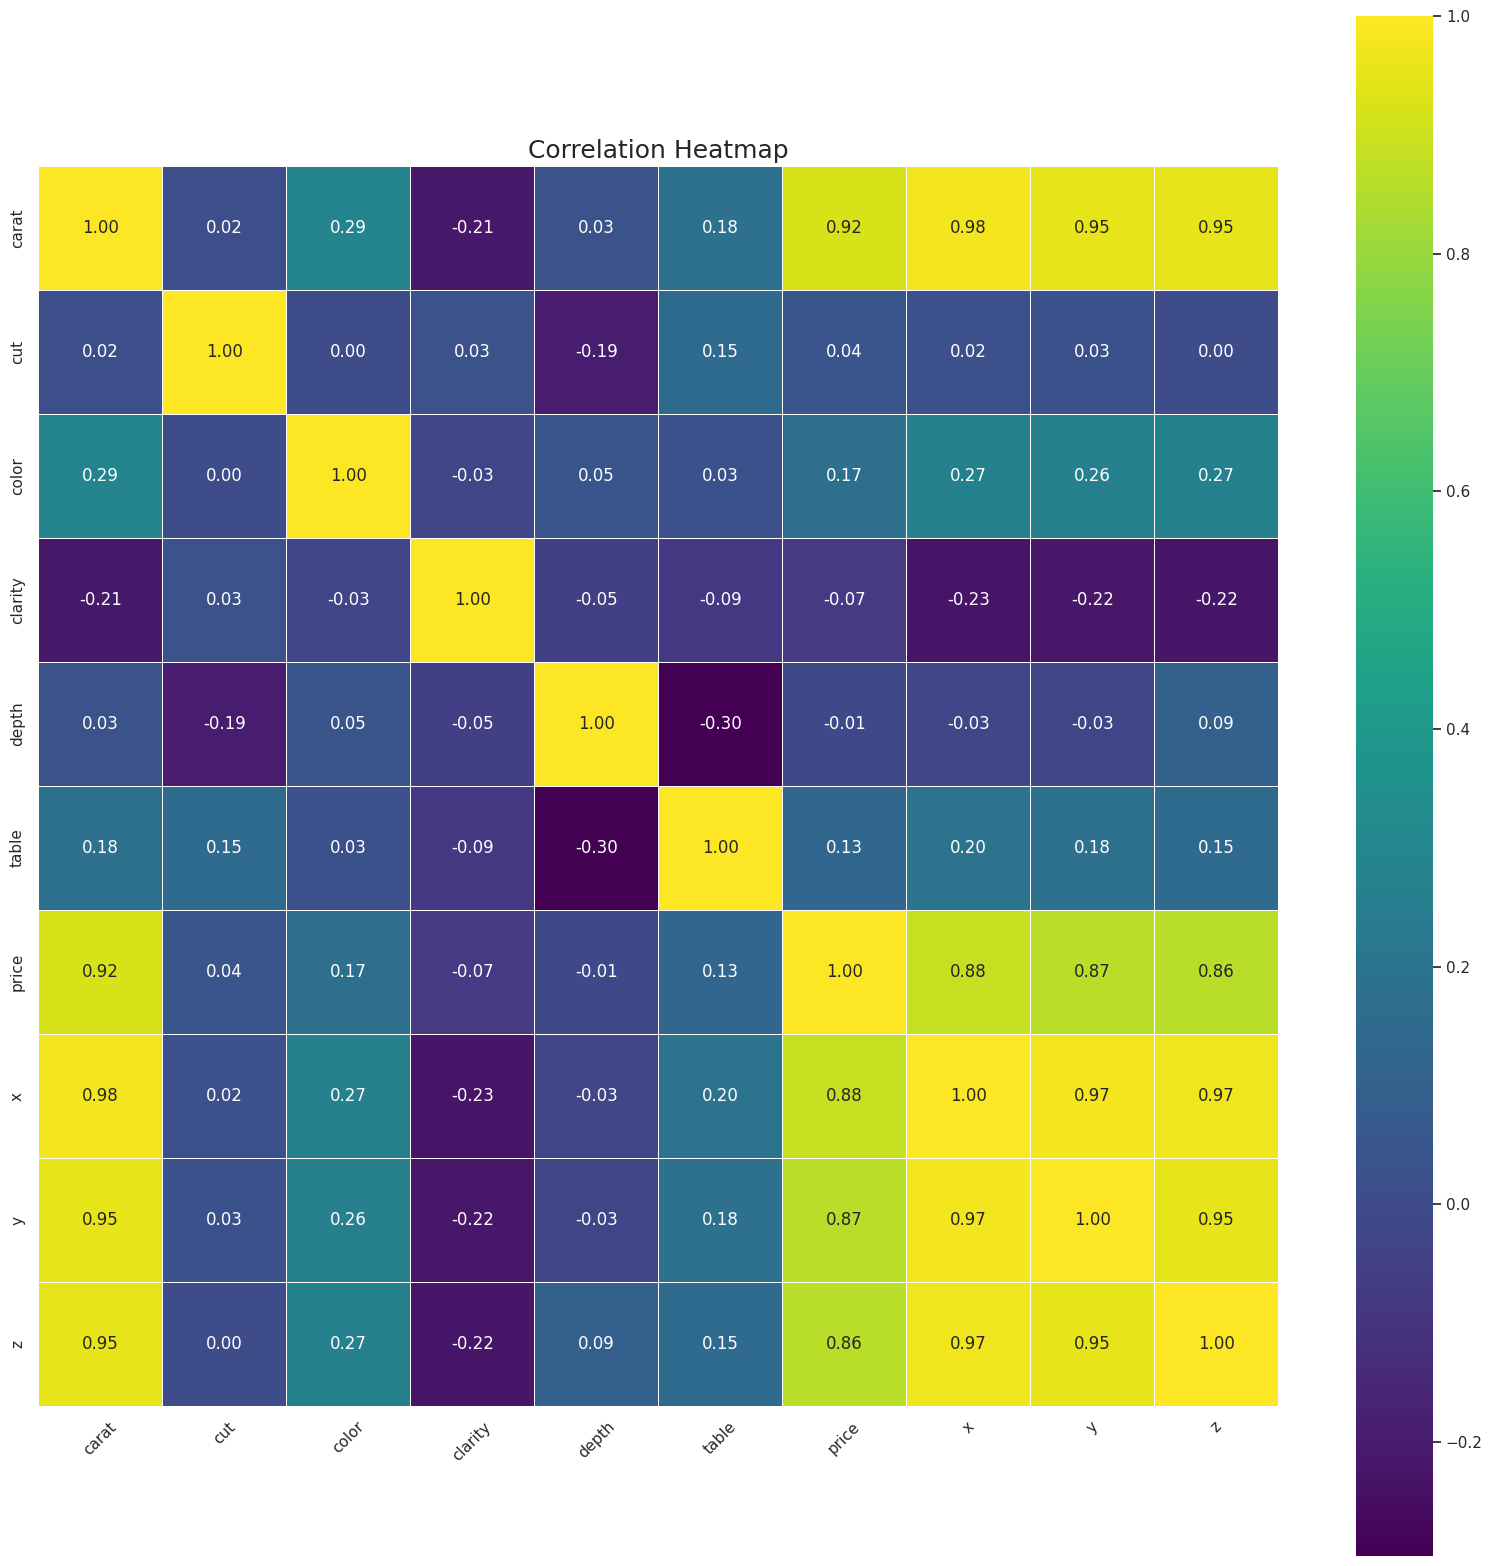

In [60]:
plt.figure(figsize=(20, 20))




# Create a correlation matrix
correlation_matrix = df.corr()

# Adjust font size
sns.set(font_scale=1)

# Set background style
sns.set_style("whitegrid")

# Create the heatmap without the index column
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, square=True)


# Set title
plt.title("Correlation Heatmap", fontsize=18)
plt.xticks(rotation=45)


# Display the plot
plt.show()

6. Data Splitting

In [61]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7. Model Building

In [62]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
#Model Training

model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)

8. Evaluation

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluate the model

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 858.71
Mean Squared Error (MSE): 1825912.99
Root Mean Squared Error (RMSE): 1351.26
R-squared (R2): 0.89


9. Scatter Plot with Regression Line

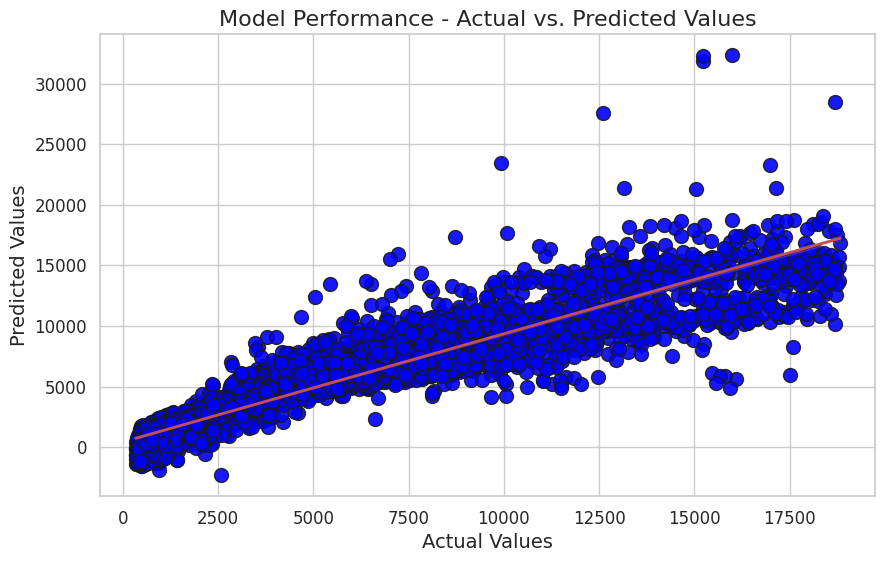

In [64]:
# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.9, edgecolors='k', s=100)

# Add a regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='r', line_kws={"color": "r", "lw": 2})

plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()

Using Polynomial degree and derivative of carat times clarity

In [65]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # Experiment with different degrees
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [66]:
# Assuming 'carat' and 'clarity' are columns in your DataFrame
X_train['carat_clarity'] = X_train['carat'] * X_train['clarity']
X_test['carat_clarity'] = X_test['carat'] * X_test['clarity']

In [67]:
# 3. Model Building with polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)  # Train on polynomial features

LinearRegression()

In [68]:
# 4. Prediction and Evaluation
y_pred = model.predict(X_test_poly)  # Predict using polynomial features
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 606.81
Mean Squared Error (MSE): 1054257.76
Root Mean Squared Error (RMSE): 1026.77
R-squared (R2): 0.93


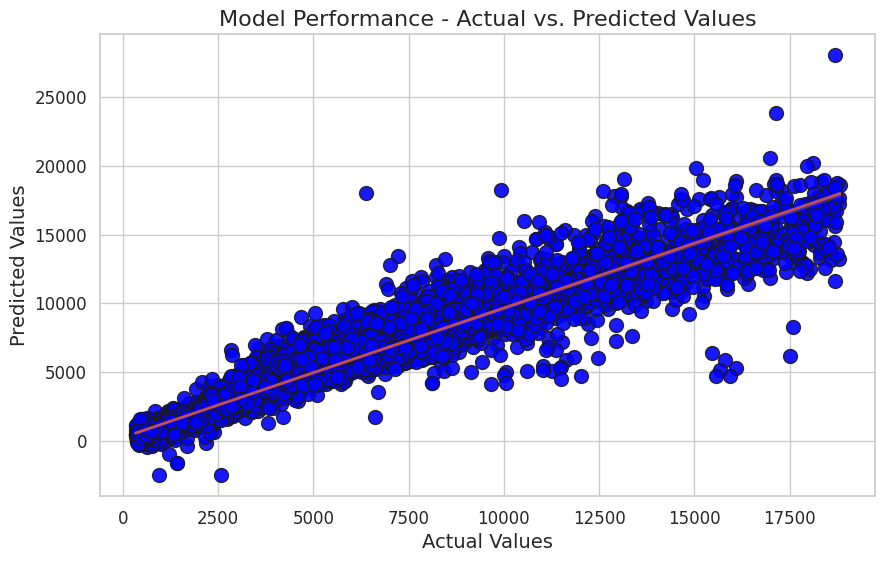

In [69]:
# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.9, edgecolors='k', s=100)

# Add a regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='r', line_kws={"color": "r", "lw": 2})

plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()

Using Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Tune hyperparameters
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [71]:
# 4. Prediction and Evaluation
y_pred = model.predict(X_test)  # Predict using original features instead of polynomial features
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 266.87
Mean Squared Error (MSE): 291213.02
Root Mean Squared Error (RMSE): 539.64
R-squared (R2): 0.98


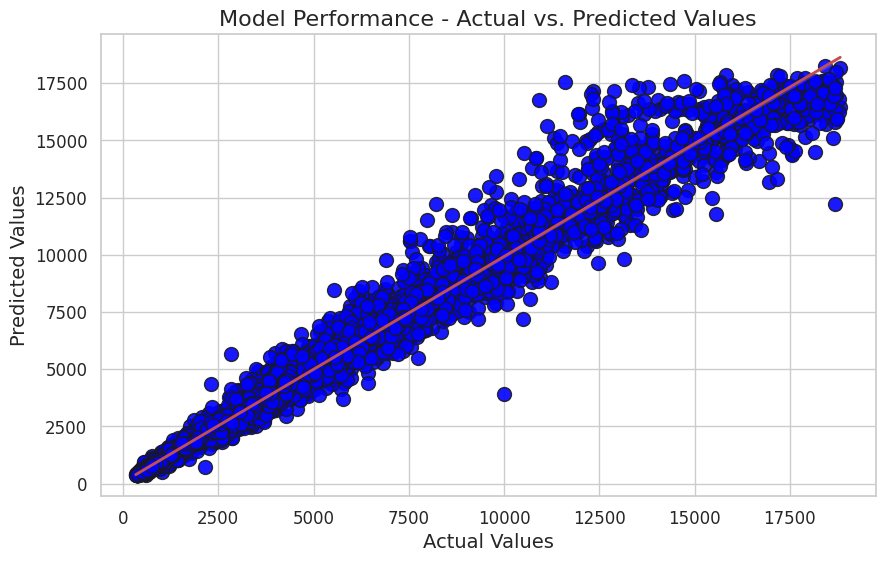

In [72]:
# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.9, edgecolors='k', s=100)

# Add a regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='r', line_kws={"color": "r", "lw": 2})

plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()

In [73]:
!pip install lime==0.2.0.1

In [74]:
import lime
import lime.lime_tabular

In [75]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['price'],
    mode='regression'
)

In [76]:
# Choose the first instance in the test set
instance_index = 0
instance = X_test.iloc[[instance_index]]

# Get the explanation
explanation = explainer.explain_instance(
    data_row=instance.values[0],
    predict_fn=model.predict
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [77]:
# To Show the explanation in a notebook
explanation.show_in_notebook(show_table=True)

In [78]:
# Choose the 100th instance in the test set
instance_index = 100
instance = X_test.iloc[[instance_index]]

# Get the explanation
explanation = explainer.explain_instance(
    data_row=instance.values[0],
    predict_fn=model.predict
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [79]:
# To Show the explanation in a notebook
explanation.show_in_notebook(show_table=True)

In [80]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Define base models
estimators = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor()),
    ('gb', GradientBoostingRegressor())
]

# Create the stacking regressor
model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Train the model
model.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf', RandomForestRegressor()),
                              ('gb', GradientBoostingRegressor())],
                  final_estimator=LinearRegression())

In [81]:
pip install graphviz

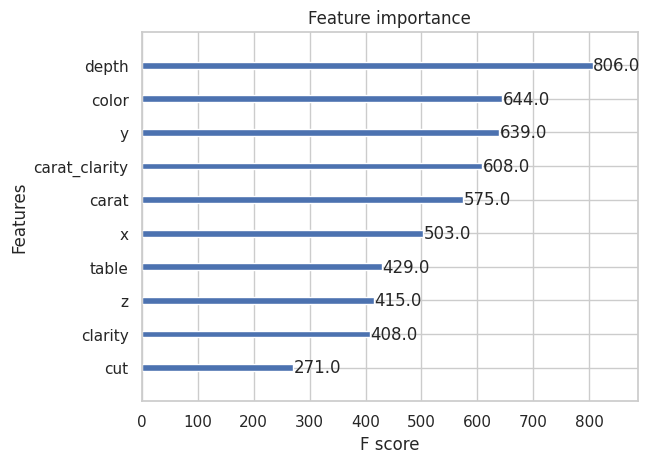

In [82]:
import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    # ... other parameters
}

# Define the number of boosting rounds
num_rounds = 100

# Train the model
model = xgb.train(params, dtrain, num_boost_round=num_rounds)

# Make predictions
y_pred = model.predict(dtest)

# Visualize a specific tree (e.g., the first tree)
graph = xgb.to_graphviz(model, num_trees=0)
graph.view("xgboost_tree")

# Plot feature importance
xgb.plot_importance(model)
plt.show()

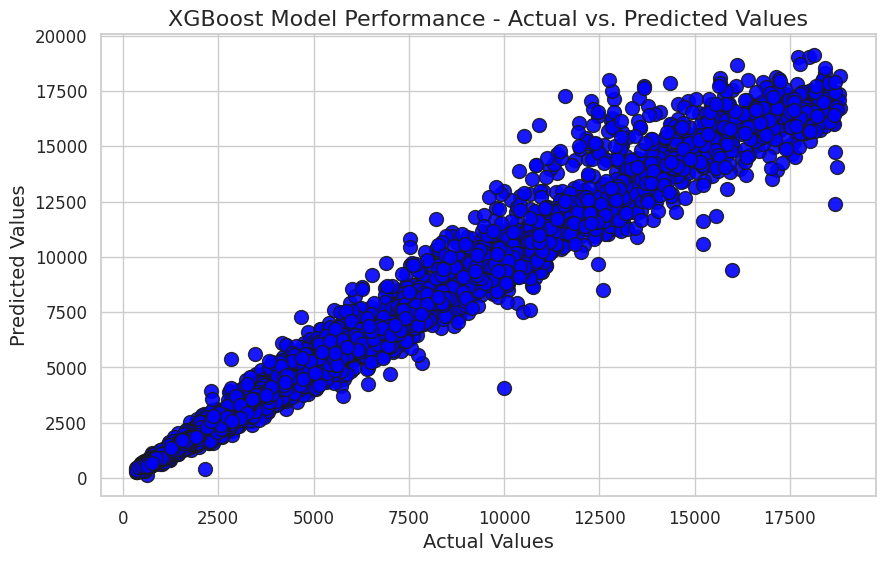

In [83]:
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(dtest)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.9, edgecolors='k', s=100)

plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("XGBoost Model Performance - Actual vs. Predicted Values", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Evaluation Matrix

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# y_test (actual values) and y_pred (predicted values)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Create a dictionary to store the metrics
evaluation_matrix = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse,
    "R-squared (R2)": r2
}

# Print the evaluation matrix
for metric, value in evaluation_matrix.items():
    print(f"{metric}: {value:.2f}")

Mean Absolute Error (MAE): 278.79
Mean Squared Error (MSE): 299379.44
Root Mean Squared Error (RMSE): 547.16
R-squared (R2): 0.98


F1 Recall precision

In [85]:
from sklearn.metrics import precision_recall_fscore_support

# y_test and y_pred are continuous values
threshold = 3000 # Define your threshold value
y_pred_binary = [1 if p >= threshold else 0 for p in y_pred]
y_test_binary = [1 if a >= threshold else 0 for a in y_test]

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Precision: 0.98
Recall: 0.98
F1 Score: 0.98


Cross validation

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"Cross-Validation RMSE Scores: {rmse_scores}")
print(f"Average RMSE: {np.mean(rmse_scores):.2f}")
print(f"Standard Deviation of RMSE: {np.std(rmse_scores):.2f}")

Cross-Validation RMSE Scores: [ 637.43217776 1312.83695675 3487.45336886  192.86100484  428.66657352]
Average RMSE: 1211.85
Standard Deviation of RMSE: 1197.52


In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor # needed for StackingRegressor
import xgboost as xgb
import numpy as np

# Define your models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Stacking Regressor': StackingRegressor(
        estimators=[('lr', LinearRegression()), ('rf', RandomForestRegressor()), ('gb', GradientBoostingRegressor())],
        final_estimator=LinearRegression()
    ),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  # Specify objective for regression
}

# Perform cross-validation for each model
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')  # 5 folds, negative MSE
    rmse_scores = np.sqrt(-scores)
    results[model_name] = {
        'avg_rmse': np.mean(rmse_scores),
        'std_rmse': np.std(rmse_scores)
    }

# Compare results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Average RMSE: {metrics['avg_rmse']:.2f}")
    print(f"  Standard Deviation of RMSE: {metrics['std_rmse']:.2f}")

Linear Regression:
  Average RMSE: 1503.87
  Standard Deviation of RMSE: 861.30
Random Forest:
  Average RMSE: 1365.99
  Standard Deviation of RMSE: 1252.96
Gradient Boosting:
  Average RMSE: 1323.23
  Standard Deviation of RMSE: 1266.52
Stacking Regressor:
  Average RMSE: 1752.51
  Standard Deviation of RMSE: 1320.68
XGBoost:
  Average RMSE: 1211.85
  Standard Deviation of RMSE: 1197.52
